In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

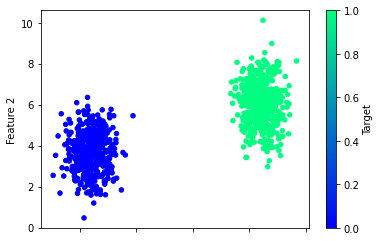

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6416 - accuracy: 0.7493
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.8011
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.8320
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.8654
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.8935
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.9334
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5579 - accuracy: 0.9684
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.9726
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.9732
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.9849
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

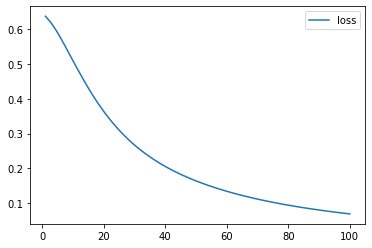

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

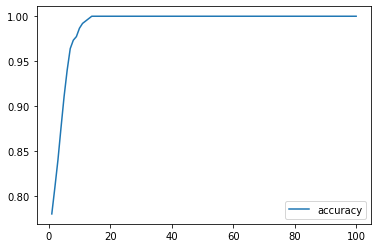

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0645 - accuracy: 1.0000
Loss: 0.06450693309307098, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

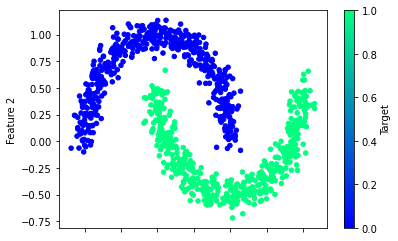

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7744 - accuracy: 0.6267
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6520
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6680
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.6880
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.6973
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7067
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.7160
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7227
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7320
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7440
Epoch 11/

24/24 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.8907
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.8907
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2592 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.8920
Epoch 92/100


<AxesSubplot:>

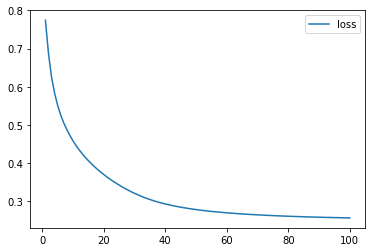

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

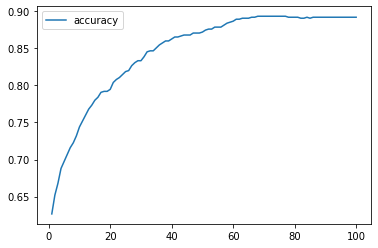

In [21]:
# Plot the loss
history_df.plot(y="accuracy")

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 1.2806 - accuracy: 0.2040
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1404 - accuracy: 0.2109
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1014 - accuracy: 0.1892
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9909 - accuracy: 0.2358
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9434 - accuracy: 0.2330
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9197 - accuracy: 0.2225
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8694 - accuracy: 0.2367
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8177 - accuracy: 0.2542
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7890 - accuracy: 0.2895
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7566 - accuracy: 0.2852
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8813
Epoch 83/100
24/24 [==============================] - 0s 997us/step - loss: 0.2609 - accuracy: 0.8803
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8714
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 0.9061
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.9006
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.8950
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.8893
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.8974
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.8928
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2360 - accuracy: 0.8985
Epoch 92/10